In [20]:
import aquire_data
import h3
import pandas as pd
import numpy as np
import overpass
from tpot import TPOTRegressor

# Load data
# import data from VBOHCAR.xlsx to a pandas dataframe
import io
import pandas as pd
import requests
from os import listdir

# check for the vbohcar.xlsx file in the current directory
if 'VBOHCAR.xlsx' in listdir():
        # read the third sheet of the excel file
    df = pd.read_excel('VBOHCAR.xlsx', sheet_name=3)
else:
    # clone the excel file from github
    url = 'https://github.com/INFORMSJoC/2020.1022/blob/master/results/VBOHCAR.xlsx?raw=true'
    file = requests.get(url)
    file_bytes = io.BytesIO(file.content)
    # read the third sheet of the excel file
    df = pd.read_excel(file_bytes, sheet_name=3)
df.head()

,ID_OHCA,ReceivedTime,MinimumResponseTime,Latitude,Longitude,Incident_Location,X_OHCA,Y_OHCA,Z_OHCA
0,1,2017-01-01 00:49:54,5.666667,36.862471,-76.024169,1000 LINDSLEY DR_x000D_,1232.449963,-4951.984772,3826.080166
1,2,2017-01-01 06:35:29,20.750000,36.766897,-76.042337,2600 SPRINGHAVEN DR_x000D_,1232.417401,-4958.562301,3817.562796
2,3,2017-01-01 06:56:25,9.650000,36.766897,-76.042337,2600 SPRINGHAVEN DR_x000D_,1232.417401,-4958.562301,3817.562796
3,4,2017-01-01 17:05:56,11.083333,36.905880,-76.118769,4200 SHORE DR_x000D_,1223.576354,-4951.197334,3829.945177
4,5,2017-01-01 19:53:20,0.000000,36.620850,-76.090090,5200 BLACKWATER RD_x000D_,1230.619605,-4969.017372,3804.526862


In [21]:
hexid_ohca_cnt = {}
for i, row in df.iterrows():
    # get the hex_id for each row
    hex_id = h3.latlng_to_cell(np.float64(row['Latitude']), np.float64(row['Longitude']), 9)
    # if the hex_id is not in the dictionary, add it
    if hex_id not in hexid_ohca_cnt:
        hexid_ohca_cnt[hex_id] = 0
    # increment the count of OHCA in the hex_id
    hexid_ohca_cnt[hex_id] += 1

# create a dataframe from the dictionary with the hex_id as the index
ohca_df = pd.DataFrame.from_dict(hexid_ohca_cnt, orient='index', columns=['OHCA'])
print(sum(ohca_df['OHCA']))
ohca_df.head()

2706


,OHCA
892af636e43ffff,3
892af0c96abffff,2
892af63720bffff,4
892af051523ffff,2
892af6266bbffff,2


In [22]:
# load virginia beach data
# check if virginia_beach.csv is in the current directory
if 'virginia_beach.csv' in listdir():
    # read the csv file
    vb_df = pd.read_csv('virginia_beach.csv')
    # set unnamed column name to hex_id
    vb_df.rename(columns={'Unnamed: 0': 'hex_id'}, inplace=True)
    # pivot the dataframe to have the hex_id as the index
    vb_df.set_index('hex_id', inplace=True)
else:
    api = overpass.API()
    vb_df = aquire_data.get_all_data('Virginia Beach', api)
vb_df.head()

,animal_boarding,atm,bank,bar,bbq,bench,bicycle_parking,bicycle_rental,bicycle_repair_station,cafe,...,ship_neighbour_count,sports_centre_neighbour_count,stadium_neighbour_count,static_caravan_neighbour_count,storage_tank_neighbour_count,terrace_neighbour_count,toilets_y_neighbour_count,university_y_neighbour_count,warehouse_neighbour_count,yes_neighbour_count
hex_id,,,,,,,,,,,,,,,,,,,,,
89f04309047ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89f0430907bffff,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89f04309613ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89f04309633ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89f04309ecbffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# add OHCA count to virginia beach dataframe
vb_df = vb_df.join(ohca_df)
# fill NaN values with 0
vb_df.fillna(0, inplace=True)
print(f"Ammount of rows: {len(vb_df)}")
print(f"Amount of OHCA: {sum(vb_df['OHCA'])}")
vb_df.head()

Ammount of rows: 4940
Amount of OHCA: 2699.0


,animal_boarding,atm,bank,bar,bbq,bench,bicycle_parking,bicycle_rental,bicycle_repair_station,cafe,...,sports_centre_neighbour_count,stadium_neighbour_count,static_caravan_neighbour_count,storage_tank_neighbour_count,terrace_neighbour_count,toilets_y_neighbour_count,university_y_neighbour_count,warehouse_neighbour_count,yes_neighbour_count,OHCA
hex_id,,,,,,,,,,,,,,,,,,,,,
89f04309047ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
89f0430907bffff,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
89f04309613ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
89f04309633ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
89f04309ecbffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [24]:
# load warsaw data
# check if warsaw.csv is in the current directory
if 'lublin.csv' in listdir():
    # read the csv file
    warsaw_df = pd.read_csv('lublin.csv')
    # set unnamed column name to hex_id
    warsaw_df.rename(columns={'Unnamed: 0': 'hex_id'}, inplace=True)
    # pivot the dataframe to have the hex_id as the index
    warsaw_df.set_index('hex_id', inplace=True)
else:
    api = overpass.API()
    warsaw_df = aquire_data.get_all_data('Lublin', api)
warsaw_df.head()

,accountant,administrative,adult_gaming_centre,advertising_agency,animal_breeding,architect,association,atm,bank,bar,...,synagogue_neighbour_count,temple_neighbour_count,terrace_neighbour_count,toilets_y_neighbour_count,train_station_neighbour_count,transportation_neighbour_count,university_neighbour_count,warehouse_neighbour_count,wayside_shrine_neighbour_count,yes_y_neighbour_count
hex_id,,,,,,,,,,,,,,,,,,,,,
89534bc0003ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89534bc0007ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89534bc000bffff,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89534bc000fffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
89534bc0013ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


XGBRegressor Score: -0.08645875791116642
XGBRegressor Score: -0.08645875791116642


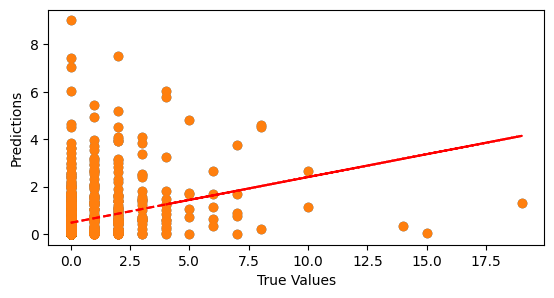

In [25]:
# check model performance
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# pure xgboost
model = XGBRegressor(max_depth=9, n_estimators=1000, learning_rate=0.1, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(vb_df.drop(columns=['OHCA']), vb_df['OHCA'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
results = model.predict(X_test)
results = np.maximum(results, 0)
print(f"{model.__class__.__name__} Score: {model.score(X_test, y_test)}")


import matplotlib.pyplot as plt
# set equal axis
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# draw a best fit line
z = np.polyfit(y_test, results, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")# check model performance
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# pure xgboost
model = XGBRegressor(max_depth=9, n_estimators=1000, learning_rate=0.1, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(vb_df.drop(columns=['OHCA']), vb_df['OHCA'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
results = model.predict(X_test)
results = np.maximum(results, 0)
print(f"{model.__class__.__name__} Score: {model.score(X_test, y_test)}")


import matplotlib.pyplot as plt
# set equal axis
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# draw a best fit line
z = np.polyfit(y_test, results, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.show()
plt.show()

XGBRegressor Score: -0.08918277154251175


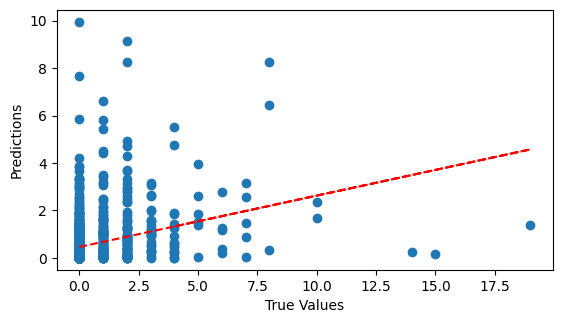

In [31]:
# check model performance
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# pure xgboost
model = XGBRegressor(max_depth=9, n_estimators=1000, learning_rate=0.1, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(vb_df.drop(columns=['OHCA']), vb_df['OHCA'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
results = model.predict(X_test)
results = np.maximum(results, 0)
print(f"{model.__class__.__name__} Score: {model.score(X_test, y_test)}")


import matplotlib.pyplot as plt
# set equal axis
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(y_test, results)
plt.xlabel('True Values')
plt.ylabel('Predictions')
# draw a best fit line
z = np.polyfit(y_test, results, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"r--")
plt.show()

In [27]:
# delete columns from warsaw_df that are not in vb_df, do the same for vb_df
war_cols = warsaw_df.columns
vb_cols = vb_df.columns
for col in war_cols:
    if col not in vb_cols:
        warsaw_df.drop(columns=[col], inplace=True)
for col in vb_cols:
    if col not in war_cols and col != 'OHCA':
        vb_df.drop(columns=[col], inplace=True)

# fit model on vb_df and predict OHCA count for warsaw_df
X = vb_df.drop(columns=['OHCA'])
y = vb_df['OHCA']

model.fit(X, y)
# predict the OHCA count for warsaw
warsaw_df['OHCA'] = model.predict(warsaw_df)
# set negative values to 0
warsaw_df['OHCA'] = np.maximum(warsaw_df['OHCA'], 0)
warsaw_df.head()

,atm,bank,bar,bbq,bench,bicycle_parking,bicycle_rental,bicycle_repair_station,cafe,car_rental,...,ruins_neighbour_count,school_y_neighbour_count,service_neighbour_count,shed_neighbour_count,stadium_neighbour_count,storage_tank_neighbour_count,terrace_neighbour_count,toilets_y_neighbour_count,warehouse_neighbour_count,OHCA
hex_id,,,,,,,,,,,,,,,,,,,,,
89534bc0003ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.084568
89534bc0007ffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.018031
89534bc000bffff,0.0,6.0,0.0,0.0,0.0,4.0,2.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0.096783
89534bc000fffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.078846
89534bc0013ffff,0.0,0.0,0.0,0.0,26.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0.000000


In [28]:
# add a column if there is a defibrillator in the hexagon
# https://aed.openstreetmap.org.pl/aed_poland.geojson
import requests
aed_url = 'https://aed.openstreetmap.org.pl/aed_poland.geojson'
aed_file = requests.get(aed_url)
aed_json = aed_file.json()

# create a column with aed count
warsaw_df['aed_count'] = 0

# iterate through aeds find the hexagon and add 1 to the column
for aed in aed_json['features']:
    x, y = aed["geometry"]["coordinates"]
    hexagon = h3.latlng_to_cell(y, x, 9)
    if hexagon in warsaw_df.index:
        warsaw_df.loc[hexagon, 'aed_count'] += 1

In [29]:
# create a map, color hexagons by the predicted number of ohca
import folium

m = folium.Map(location=[51.2465, 22.5684], zoom_start=11)

max_ohca = warsaw_df['OHCA'].max()

# get top 10 hexagons with the most predicted ohca that have no defibrillators or hospitals
top_10_hexagons = warsaw_df[warsaw_df['aed_count'] == 0].sort_values(by='OHCA', ascending=False).head(10)

# add hexagons with opacity based on the number of ohca
for i, row in warsaw_df.iterrows():
    if row['aed_count'] == 0 and row['hospital_x'] == 0:
        boundary = h3.cell_to_boundary(i)
        folium.Polygon(locations=boundary, fill_color='red', fill_opacity=row['OHCA']/max_ohca).add_to(m)
    else:
        boundary = h3.cell_to_boundary(i)
        folium.Polygon(locations=boundary, fill_color='green', fill_opacity=0.6).add_to(m)
m